- Understand difference between Tensorflow's two modes: Eager Execution and Graph Execution
- Practice defining and performing basic operations on constant Tensors
- Use Tensorflow's automatic differentiation capability

In [1]:
import tensorflow as tf
print(tf.__version__)

/usr/local/envs/py3env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.8.0


# Enable eager execution

In [2]:
tf.enable_eager_execution()

### Adding Two Tensors

In [3]:
a = tf.constant(value=[7, 5, 4], dtype=tf.int32)
b = tf.constant(value=[2, 9, 1], dtype=tf.int32)
c = tf.add(a, b)
print(c)

tf.Tensor([ 9 14  5], shape=(3,), dtype=int32)


### Overloaded Operators
We can also perform a tf.add() using the + operator. The /,-,* and ** operators are similarly overloaded with the appropriate tensorflow operation.

In [4]:
d = a + b
print(d)

tf.Tensor([ 9 14  5], shape=(3,), dtype=int32)


## NumPy Interoperability
In addition to native TF tensors, tensorflow operations can take native python types and NumPy arrays as operands.

In [5]:
import numpy as np

a_py = [4, 6, 8]  # native python list
b_py = [2, 4, 9]  # native python list

a_np = np.array( object = [4, 6, 8])  # numpy array
b_np = np.array( object = [2, 4, 9])  # numpy array

a_tf = tf.constant(value = [4, 6, 8], dtype = tf.int32)  # native TF tensor
b_tf = tf.constant(value = [2, 4, 9], dtype = tf.int32)  # native TF tensor

for result in [tf.add(a_py, b_py), tf.add(a_np, b_np), tf.add(a_tf, b_tf)]:
    print("Type: {},  Value: {}".format(type(result), result))

Type: <class 'EagerTensor'>,  Value: [ 6 10 17]
Type: <class 'EagerTensor'>,  Value: [ 6 10 17]
Type: <class 'EagerTensor'>,  Value: [ 6 10 17]


You can convert a native TF tensor to a NumPy array using .numpy()

In [6]:
a_tf.numpy()

array([4, 6, 8], dtype=int32)

In [7]:
type(a_tf.numpy())

numpy.ndarray

# Linear Regression
Low level tensorflow operations to implement linear regression.
Toy Dataset:
    
    
We'll model the following function:

$$
y = 2x + 10
$$

Create the dataset for the problem based on the curve chosen

In [8]:
X = tf.constant(value = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype = tf.float32)
Y = 2 * X + 10
print("X: {}".format(X))
print("Y: {}".format(Y))

X: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Y: [10. 12. 14. 16. 18. 20. 22. 24. 26. 28.]


### Loss function linear regression
The function loss_mse below takes four arguments: the tensors $X$, $Y$ and the weights $w_0$ and $w_1$. Complete the function below to compute the Mean Square Error (MSE). 

In [9]:
def loss_mse(X, Y, w0, w1):
    Y_hat = w0 * X + w1   # Y_hat = tf.matmul(w0, X) + w1
    return  tf.reduce_mean((Y_hat - Y)**2)

### Gradient Function
To use gradient descent we need to take the partial derivative of the loss function with respect to each of the weights. We could manually compute the derivatives, but with Tensorflow's automatic differentiation capabilities we don't have to!

In [10]:
# Counting from 0, the 2nd and 3rd parameter to the loss function are our weights
grad_f = tf.contrib.eager.gradients_function(f = loss_mse, params = [2, 3])

In [11]:
print(grad_f)

<function gradients_function.<locals>.decorated at 0x7f53eb90d730>


In [12]:
STEPS = 1000
LEARNING_RATE = .02

# Initialize weights
w0 = tf.constant(value = 0.0, dtype = tf.float32)
w1 = tf.constant(value = 0.0, dtype = tf.float32)

for step in range(STEPS):
    #1. Calculate gradients
    d_w0, d_w1 = grad_f(X, Y, w0, w1) # derivatives calculated by tensorflow!
    
    #2. Update weights
    w0 = w0 - LEARNING_RATE * d_w0
    w1 = w1 - LEARNING_RATE * d_w1
    
    #3. Periodically print MSE
    if step % 100 == 0:
        print("STEP: {}  MSE: {}".format(step, loss_mse(X, Y, w0, w1)))


# Print final MSE and weights
print("STEP: {}  MSE: {}".format(STEPS, loss_mse(X, Y, w0, w1)))
print("w0: {}".format(w0))
print("w1: {}".format(w1))

STEP: 0  MSE: 35.70719528198242
STEP: 100  MSE: 2.6017532348632812
STEP: 200  MSE: 0.26831889152526855
STEP: 300  MSE: 0.027671903371810913
STEP: 400  MSE: 0.0028539239428937435
STEP: 500  MSE: 0.0002943490108009428
STEP: 600  MSE: 3.0356444767676294e-05
STEP: 700  MSE: 3.1322738323069643e-06
STEP: 800  MSE: 3.2238213520940917e-07
STEP: 900  MSE: 3.369950718479231e-08
STEP: 1000  MSE: 3.654804459074512e-09
w0: 2.0000178813934326
w1: 9.999887466430664


## Polynomial Regression

Try modelling a non-linear function such as: $y=xe^{-x^2}$

Creating more training data will help. Also, you will need to build non-linear features.

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


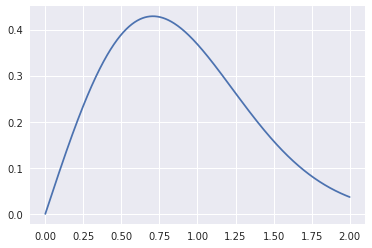

In [37]:
from matplotlib import pyplot as plt
%matplotlib inline

X = tf.constant(value = np.linspace(0, 2, 1000), dtype = tf.float32)
Y = X * np.exp(-X**2)
plt.plot(X, Y)

In [38]:
def make_features(X):
    features = [X]
    features.append(tf.ones_like(X))  # Bias
    features.append(X**2)
    features.append(X**3)
    features.append(tf.sqrt(X))
    features.append(tf.exp(X))
    return tf.stack(features, axis=-1)

def make_weights(n_weights):     # zero initialization of weights
    W = [tf.constant(value = 0.0, dtype = tf.float32) for _ in range(n_weights)]
    #return W
    #return tf.stack(W)
    return tf.expand_dims(tf.stack(W), -1)

def predict(X, W):
    Y_hat = tf.matmul(X, W)
    return  tf.squeeze(Y_hat, axis=-1)

def loss_mse(X, Y, W):
    Y_hat = predict(X, W)
    return  tf.reduce_mean((Y_hat - Y)**2)


# Counting from 0, the 2nd parameter to the loss function is our weight
grad_f = tf.contrib.eager.gradients_function(f = loss_mse, params = [2])

STEP: 2000  MSE: 0.0030980368610471487


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


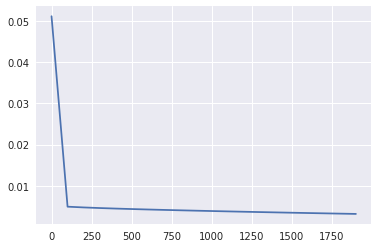

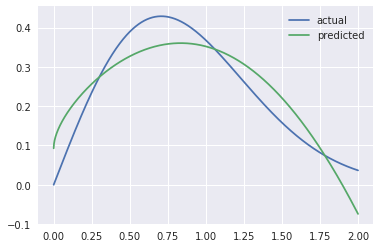

In [39]:
STEPS = 2000
LEARNING_RATE = .02

# Features and Weights
#print("Xlen before: {}\n".format(X.shape))
Xf = make_features(X)  # input
#print("Xf len: {}  Xf: {}\n".format(Xf.shape, Xf))
W = make_weights(Xf.shape[1])
#print("W len: {}  W: {}\n".format(len(W), W))   #directly passing list appended with tensorflow constants value
#print("W len: {}  W: {}\n".format(W.shape, W))


# for plotting
steps = []
losses = []


plt.figure()

for step in range(STEPS):
    #1. Calculate gradients
    d_w = grad_f(Xf, Y, W)[0] # derivatives calculated by tensorflow!
    #print(d_w)
    
    #2. Update weights
    W -=  LEARNING_RATE * d_w
    
    #3. Periodically print MSE
    if step % 100 == 0:
        loss = loss_mse(Xf, Y, W)
        steps.append(step)
        losses.append(loss)
        plt.clf()
        plt.plot(steps, losses)


# Print final MSE and weights
print("STEP: {}  MSE: {}".format(STEPS, loss_mse(Xf, Y, W)))

# Plot results
plt.figure()
plt.plot(X, Y, label='actual')
plt.plot(X, predict(Xf, W), label='predicted')
plt.legend()
